In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

# Question 1

In [33]:
airpol_df = pd.read_csv('airpol.csv')
print(airpol_df)

    Wind  Solar Rad  CO  NO  NO2  O3  HC
0      8         98   7   2   12   8   2
1      7        107   4   3    9   5   3
2      7        103   4   3    5   6   3
3     10         88   5   2    8  15   4
4      6         91   4   2    8  10   3
5      8         90   5   2   12  12   4
6      9         84   7   4   12  15   5
7      5         72   6   4   21  14   4
8      7         82   5   1   11  11   3
9      8         64   5   2   13   9   4
10     6         71   5   4   10   3   3
11     6         91   4   2   12   7   3
12     7         72   7   4   18  10   3
13    10         70   4   2   11   7   3
14    10         72   4   1    8  10   3
15     9         77   4   1    9  10   3
16     8         76   4   1    7   7   3
17     8         71   5   3   16   4   4
18     9         67   4   2   13   2   3
19     9         69   3   3    9   5   3
20    10         62   5   3   14   4   4
21     9         88   4   2    7   6   3
22     8         80   4   2   13  11   4
23     5        

(Used AI to generate the markdown formula below)

### Covariance and variance formula 

# Sample Covariance and Variance Formulas

**Sample Covariance between X and Y:**

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}
$$

**Sample Variance of X:**

$$
\text{Var}(X) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}
$$

In [34]:
# extract the two variables
wind = airpol_df['Wind']
solar_rad = airpol_df['Solar Rad']

# calculate the means
mean_wind = wind.mean()
mean_solar = solar_rad.mean()

# compute the covariance numerator by summing over the product of deviations
numerator = ((wind - mean_wind) * (solar_rad - mean_solar)).sum()

# for sample covariance, divide by (n - 1)
n = len(wind)
covariance = numerator / (n - 1)

print("Covariance:", covariance)

# Compute sample variances using first principles
var_wind = ((wind - mean_wind) ** 2).sum() / (n - 1)
var_solar = ((solar_rad - mean_solar) ** 2).sum() / (n - 1)

print("variance for wind:", var_wind)
print("variance for solar rad:", var_solar)

cov_var_matrix = np.array([[var_wind, covariance],
               [covariance, var_solar]])
print("Covariance-Variance Matrix:")
print(cov_var_matrix)

# now get the correlation between the 2 variables using first principles
std_wind = np.sqrt(var_wind) # standard deviation of wind
std_solar = np.sqrt(var_solar) # standard deviation of solar rad         
correlation = covariance / (std_wind * std_solar)
print("Correlation:", correlation)


#compute the correlation matrix 
correlation_matrix = np.array([[1, correlation],
                               [correlation, 1]])

print("Correlation Matrix:")
print(correlation_matrix)


Covariance: -2.7804878048780486
variance for wind: 2.5
variance for solar rad: 300.51567944250877
Covariance-Variance Matrix:
[[  2.5         -2.7804878 ]
 [ -2.7804878  300.51567944]]
Correlation: -0.10144191102756318
Correlation Matrix:
[[ 1.         -0.10144191]
 [-0.10144191  1.        ]]


In [35]:
#pip install matplotlib

## I am lead to believe that in this question we are more interested in the relationship between the variables and we are expressing this relationship in terms of vectors, hence we will employ the use of the correlation.

We start by centering the variables:

$$
x = \text{wind} - \text{mean\_wind} \quad\text{and}\quad y = \text{solar\_rad} - \text{mean\_solar}
$$

The dot product of the centered variables gives the covariance (up to the normalization factor):

$$
\text{covariance} = \frac{x^T y}{n-1}
$$

Thus, the correlation can be written as:

$$
\text{correlation} = \frac{x^T y}{(n-1)\, \text{std\_wind}\, \text{std\_solar}}
$$

Alternatively, if we form the matrix \(A\) with the centered variables as columns,

$$
A = \begin{bmatrix} x & y \end{bmatrix},
$$

then the covariance matrix is

$$
\text{Cov} = \frac{A^T A}{n-1},
$$

and the off-diagonal element of $\text{Cov}$ is exactly $\frac{x^T y}{n-1}$. Therefore, the correlation is

$$
\text{correlation} = \frac{\text{Cov}[0,1]}{\text{std\_wind}\, \text{std\_solar}}.
$$(\text{Cov}\) is exactly (\frac{x^T y}{n-1}). Therefore, the correlation is

$$
\text{correlation} = \frac{\text{Cov}[0,1]}{\text{std\_wind}\, \text{std\_solar}}.
$$

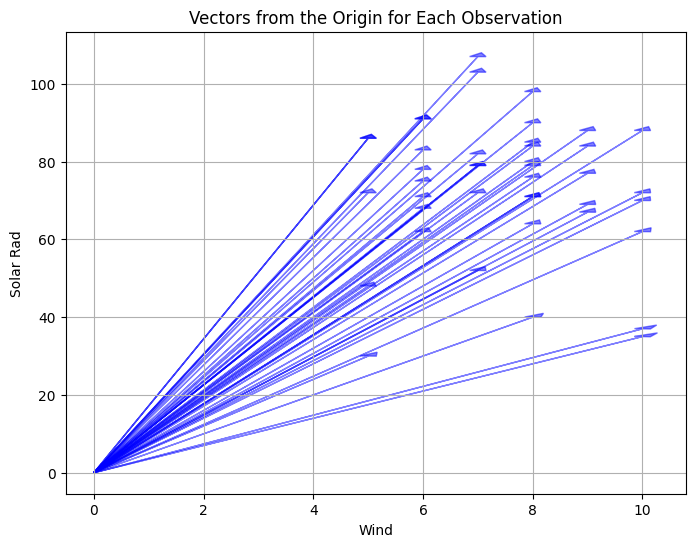

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for w, s in zip(wind, solar_rad):
  plt.arrow(0, 0, w, s, head_width=0.3, head_length=1, fc='blue', ec='blue', alpha=0.5)
plt.xlabel('Wind')
plt.ylabel('Solar Rad')
plt.title('Vectors from the Origin for Each Observation')
plt.grid(True)
plt.show()

(explanation from AI on why we use the notation of Cov(0,1))
The notation **[0,1]** in the covariance matrix is used to refer to the position of the element representing the covariance between the two variables. In a 2x2 covariance matrix, the indices are zero-based, meaning:

- **0** represents the first variable (e.g., wind).
- **1** represents the second variable (e.g., solar radiation).

Thus, **Cov[0,1]** is the element in the first row and second column of the matrix, which holds the covariance between these two variables. This convention is common in programming and mathematical notation when dealing with arrays or matrices.